In [101]:
%pylab inline
from sys import platform
import pandas as pd
from datetime import datetime
import text2emotion

if platform == "win32":
    path = 'C:/Users/olive/'
elif platform == "darwin":
    path = '~/'
    
%run SentimentAnalysis.ipynb
%run GeoFeatures.ipynb

Populating the interactive namespace from numpy and matplotlib


In [2]:
# EXPLORATORY ANALYSIS

from wordcloud import WordCloud

def cloud_gen(text):
    long_string = ','.join(list(text.values))

    wordcloud = WordCloud(background_color="white",
                          max_words=5000,
                          contour_width=3,
                          contour_color='steelblue'
                         )

    return wordcloud.generate(long_string)

In [4]:
### READS IN RAW REDDIT DATA FROM UNIVERSITY ONEDRIVE
### INTO COMMENT AND SUBMISSION DATAFRAMES

c_df = pd.read_csv(path + 'OneDrive - Cardiff University/Individual Project/raw data/comments.csv', index_col ='id')
s_df = pd.read_csv(path + 'OneDrive - Cardiff University/Individual Project/raw data/submissions.csv', index_col ='id')

In [8]:
### LOADS PROCESSED DATA

c_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/comments.csv')
s_df = pd.read_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/submissions.csv')

In [ ]:
### ATTEMPT TO GEOCODE LOCATIONS FOR EACH SUBMISSION WHERE POSSIBLE

subs2geocode = s_df.sample(500)
subs2geocode['coords'] = get_captions([*subs2geocode['title'].values])

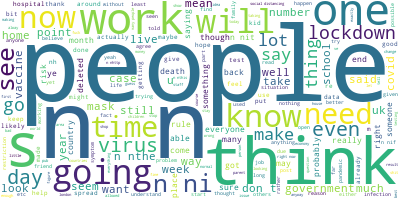

In [11]:
pt_wordcloud = cloud_gen(c_df['processed_text'])
pt_wordcloud.to_image()

In [ ]:
### PROCESSING OF RAW COMMENT AND SUBMISSION DATA

# Create a datetime from the 'created_utc' column of each row
c_df['datetime'] = [datetime.fromtimestamp(i) for i in c_df['created_utc']]
s_df['datetime'] = [datetime.fromtimestamp(i) for i in s_df['created_utc']]

In [ ]:
# Perform sentiment analysis on each comment and return the sentiment and compound score
c_df['sentiment'] , c_df['compound_score'] = sentiment_analysis([*c_df['body']])

In [6]:
# TEXT PREPROCESSING
import re

# REMOVING PUNCTUATION
c_df['processed_text'] = c_df['body'].map(lambda x: re.sub('[,\.!?]', '', x))

# SET ALL TEXT TO LOWERCASE
c_df['processed_text'] = c_df['processed_text'].map(lambda x: x.lower())

c_df['processed_text'].head()

id
fhc1f60    do you know what time each day gmt the figures...
fhaw2m3    worrying part of the uk known cases are all pe...
fhawse0    you’d of thought so could be 100 people carryi...
fhazbjz                         damni’ll go there in 2 weeks
fhawk4d    surely it’s going to hit at all large multi-na...
Name: processed_text, dtype: object

In [103]:
comments = c_df.sample(10)

comments['happy'], comments['angry'], comments['suprise'], comments['sad'], comments['fear'] = get_emotions([*comments['processed_text']])
# get_emotions([*comments['processed_text']])

comments
# comments.sample(5)

,datetime,body,processed_text,sentiment,compound_score,submission_id,parent_id,happy,angry,suprise,sad,fear
id,,,,,,,,,,,,
fl9j2w8,2020-03-23 10:06:58,I'm not a Dr but my asthma nurse always told m...,i'm not a dr but my asthma nurse always told m...,neutral,0.0000,fnhary,t3_fnhary,0.00,0.00,0.00,1.00,0.00
ggcf468,2020-12-19 08:55:08,My youngest was one who flourished under lockd...,my youngest was one who flourished under lockd...,positive,0.8594,kfj6as,t1_gg92gnh,0.27,0.04,0.19,0.27,0.23
gheq2ep,2020-12-29 17:19:04,Sorry... Posted on the wrong ruddy story! My m...,sorry posted on the wrong ruddy story my mistake,negative,-0.7263,kmgk6l,t1_ghempkm,0.00,0.50,0.00,0.50,0.00
gaubje4,2020-11-01 23:15:48,Oh fuck off. OP is acting sensibly and trying ...,oh fuck off op is acting sensibly and trying t...,negative,-0.5423,jmbnc0,t1_gau8fea,1.00,0.00,0.00,0.00,0.00
gaptd36,2020-10-31 17:48:28,I think they're still lying about kids getting...,i think they're still lying about kids getting...,negative,-0.1280,jlhzg2,t1_gapk03a,0.17,0.00,0.33,0.33,0.17
flx0geo,2020-03-30 13:34:54,Yeah they've been saying it for the past week ...,yeah they've been saying it for the past week ...,negative,-0.8758,frn81v,t1_flwzuwu,0.11,0.07,0.21,0.14,0.46
fk06eoo,2020-03-09 08:54:01,School play? What fucking performance were you...,school play what fucking performance were you ...,negative,-0.8126,ffqdgh,t1_fk04a5i,0.10,0.00,0.50,0.00,0.40
gadx7hh,2020-10-28 15:02:52,Good to know you saw the post and remembered i...,good to know you saw the post and remembered i...,positive,0.7088,jj3wpa,t1_gaaohkl,0.67,0.00,0.00,0.33,0.00
ggqlvwe,2020-12-22 22:43:56,What would I do? Perhaps I’m in the minority h...,what would i do perhaps i’m in the minority he...,positive,0.5515,kifdnd,t1_ggqlc6z,0.12,0.00,0.00,0.12,0.75


In [39]:
### REFORMAT DATAFRAMES

c_df = c_df[['datetime', 'body', 'processed_text', 'sentiment', 'compound_score', 'submission_id', 'parent_id']]
s_df = s_df[['datetime', 'title', 'selftext']]

In [8]:
### SAVE PROCESSED DATA

c_df.to_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/comments.csv')
s_df.to_pickle(path + 'OneDrive - Cardiff University/Individual Project/processed data/submissions.csv')